In [2]:

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
train_imgs=mnist.train.images
train_labels=mnist.train.labels

test_imgs=mnist.test.images
test_labels=mnist.test.labels

print(train_imgs.shape)

(55000, 784)


In [0]:
def generator(y):

  hidden=tf.layers.dense(inputs=y,units=256,kernel_initializer=tf.initializers.glorot_normal(),activation=tf.nn.relu,name='hidden1')
  generate=tf.layers.dense(inputs=hidden,units=28*28,kernel_initializer=tf.initializers.glorot_normal(),activation=tf.nn.sigmoid,name='generator')
  return generate

In [0]:
def discriminator(x,reuse=False):
  #tf.get_variable_scope().reuse_variables()

  hidden=tf.layers.dense(inputs=x,units=256,kernel_initializer=tf.initializers.glorot_normal(),activation=tf.nn.relu,name='hidden2',reuse=reuse)
  discriminate=tf.layers.dense(inputs=hidden,units=1,kernel_initializer=tf.initializers.glorot_normal(),activation=tf.nn.sigmoid,name='discriminator',reuse=reuse)
  return discriminate

In [0]:
x=tf.placeholder(tf.float32,[None,28*28])
y=tf.placeholder(tf.float32,[None,100])




In [6]:
gen=generator(y)
dis_f=discriminator(gen)
dis_r=discriminator(x,True)


Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
d_loss=tf.reduce_mean(-(tf.log(dis_r)+tf.log(1-dis_f)))
g_loss=tf.reduce_mean(-tf.log(dis_f))
lr=0.0002

g_list=[tf.global_variables()[0],tf.global_variables()[1],tf.global_variables()[2],tf.global_variables()[3]]
d_list=[tf.global_variables()[4],tf.global_variables()[5],tf.global_variables()[6],tf.global_variables()[7]]

g_opt=tf.train.AdamOptimizer(lr).minimize(g_loss,var_list=g_list)
d_opt=tf.train.AdamOptimizer(lr).minimize(d_loss,var_list=d_list)


sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [0]:
def get_batch(images,labels,batch_size=32):
  idx=np.random.choice(images.shape[0],batch_size)
  return images[idx],labels[idx]

In [0]:
def get_noise(noise_size,batch_size=32):
  return np.random.normal(size=(batch_size,noise_size))

In [46]:
record=[]
for i in range(10000):
  train_x,_=get_batch(train_imgs,train_labels)
  train_y=get_noise(100)

  _,d_l=sess.run([d_opt,d_loss],feed_dict={x:train_x,y:train_y})
  _,g_l=sess.run([g_opt,g_loss],feed_dict={y:train_y})
  
  
  if i%100==0:
    print(d_l,g_l)
    record.append([d_l,g_l])

0.16381392 4.3309636
0.09167184 4.617282
0.08854624 3.8614445
0.104171336 4.0329065
0.1048647 5.61376
0.1038893 4.5051675
0.15588488 4.596833
0.1807644 3.3079865
0.14924598 4.346288
0.39001048 3.879757
0.14182293 3.965728
0.116794765 4.8250313
0.14352103 3.7137299
0.28182173 4.326074
0.35945323 2.9809065
0.13193324 3.373025
0.18298703 3.441537
0.17101786 3.7179155
0.09474465 4.1534605
0.09010124 4.058568
0.15038916 3.540495
0.053661674 5.0790176
0.08381012 4.0050697
0.1045775 3.816829
0.1039018 4.8502197
0.31964087 3.562194
0.11667307 4.2877254
0.1252265 4.4411883
0.097828716 3.947383
0.17736939 4.801002
0.101408094 5.2364264
0.23702183 4.7567024
0.2499345 3.729013
0.07601489 5.0165973
0.07025774 4.8891525
0.14703336 4.3657646
0.100824416 4.5135775
0.12984821 4.6903934
0.44606552 4.637914
0.19225664 3.8849916
0.1939745 3.8017364
0.20857355 4.3261704
0.105245285 4.2336893
0.18419921 4.8816733
0.4253469 3.67569
0.16134672 3.6395488
0.07988593 3.6816301
0.14735797 3.6113706
0.18288697 4.5

In [59]:
test_noise=get_noise(100,1)
test_gen=sess.run(gen,feed_dict={y:test_noise})
print(test_gen.shape)

(1, 784)


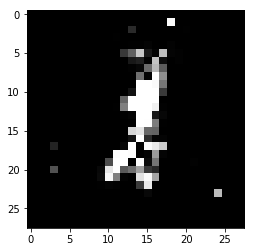

In [60]:
plt.imshow(test_gen.reshape(28,28),'gray')